<a href="https://colab.research.google.com/github/bekkahmoore/Numerical-Methods/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 3#
##Sanjiv T, Kushal K, Aayush K, Bekkah M##
##Numerical Methods --> Dr. Jacob##




We will utilize a lot of the code for error approximation we built in the first and second parts of this project here as well: 

In [ ]:
import math
 
def TrueError(TrueValue, Estimate):
  return TrueValue - Estimate 
 
def RelativeError(TrueValue, Estimate):
  return TrueError(TrueValue, Estimate)/TrueValue
 
def ApproxError(PresentEstimate, PreviousEstimate):
  return PresentEstimate - PreviousEstimate
 
def RelativeApproxError(PresentEstimate, PreviousEstimate):
  return ApproxError(PresentEstimate, PreviousEstimate)/PresentEstimate
 
def TaylorCoefficient(n):
  return (-1**(n)/3**(n))
 
def TaylorTerm(n, input):
  return TaylorCoefficient(n)*(input-2)**n
 
def TaylorPolynomial(n, input):
  sum = 0
  for i in range(0,n+1):
    sum = sum + TaylorTerm(i, input)
  return sum

#New Rapshon Method


It is the symbolic knowledge of the first derivative. The Newton-Raphson method is also known as Newton's method. This help is to find is a good approximation for the root of a real-valued function f ( x ) = 0 f(x) = 0 f(x)=0. It is based on the idea of a continuous and differentiable function. It can be approximated by a straight line tangent to it.
The formula :
$$
x_{i+1}= x_i-\frac{f(x_i)}{f'(x_i)}
$$



In [ ]:
import math
import numpy as np
from scipy.misc import derivative
def newton_rep(function, derivative, presentValue):
   rootValue=presentValue - function(presentValue)/derivative(presentValue)
   return rootValue

   

def newton(function, derivative, starter, tolerance, max_rep):
  x = starter
  for counter in range(max_rep):
    if derivative(x) == 0:
      return None
    if abs(function(x))< tolerance:
      return [x,counter]
    x = newton_rep(function, derivative, x)
  return None
  


In [ ]:
initial_seeds=[14,8,15,9,13,-4,-6,-14]
roots = []
itern_s = []

for seed in initial_seeds:
  if newton(lambda:1-x, lambda:x, seed,1e-10,20) != None: 
    roots.append(newton(lambda:1-x, lambda:x,seed,1e-10,20)[0])
    itern_s.append(newton(lambda:1-x,lambda:x,seed,1e-10,20)[1])
  else:
    roots.append('None Found')
    itern_s.append('>20')

We are going to use the package plotty here.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(data=[go.Table(
                header=dict(values=['Seeds', 'Roots', 'itern_s']),
                 cells=dict(values = [initial_seeds,roots,itern_s]))
                     ])
fig.show()

# Bisection Method

We have chosen Bisection Method for this part. We have wisely chosen the returning positive and negative values.

In [ ]:
import math
def bisection(f, a, b):
    
    fa = f(a)
    fb = f(b)
    
    if fa*fb > 0:
        print("f(a) and f(b) must have different signs.")
        return None
    
    for _ in range(100):
        
        c = (a + b)/2
        fc = f(c)
        
        if fc == 0:
            break
    
        if fb*fc > 0:
            a, fz = c, fc
    
        if fb*fc > 0: 
            b, fb = c, fc
    
    return c

func = lambda x:  x**3 -x - 1
a = 1
b = 5

x = bisection(func, a, b)
print("Roots: {}".format((1 + math.sqrt(5))/2))

    
    
    

Roots: 1.618033988749895


#Lagrange Interpolation#


It is one of the method to find a polynomial that will take some certain values at arbitrary points.

In [ ]:
def f(x): 
  return 1/(1-x)
  
def LagrangeCoefficient(InArray,OutArray,entry,variable):
  LC = 1
  for i in range(len(InArray)):
    if i == entry:
      continue
    else:
      LC = LC*(variable - InArray[i])/(InArray[entry]-InArray[i])
  return LC

def LagrangeInter(InArray, OutArray, variable):
  LI = 0
  for i in range(len(InArray)):
    LI = LI + LagrangeCoefficient(InArray,OutArray,i,variable)*OutArray[i]
  return LI

In [ ]:
inputValues = [2, 2.1, 2.2, 4]
outputValues = [f(x) for x in inputValues]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


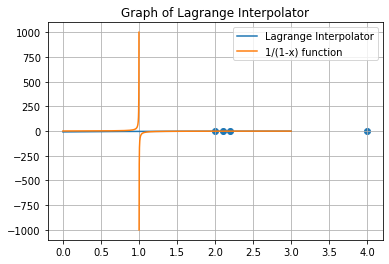

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

x = np.arange( 0,3,.001)
plt.scatter(inputValues,outputValues)
plt.plot(x,LagrangeInter(inputValues,outputValues,x))
plt.plot(x, f(x))
plt.title('Graph of Lagrange Interpolator')
plt.legend(['Lagrange Interpolator', '1/(1-x) function'])
plt.grid()
plt.show()

In [ ]:
anonymous = lambda x: lagrangeInterpolator(inputValues,outputValues,x)
bisection(anonymous,2,0)

In [ ]:
bisection(anonymous,2.0001,0)

#Differences NewRapshon and Other methods of Algorithm

These methods are equivalent in respect of geometric perspective. 
However, there are differences among them.
New Rapshon Method uses a line which is tangent to one point but secant uses a line that is secant at two points. New Rapshon methods converges quadrilaterally. Secant converges superlinearly. While Bisection method converges linearly. Secant method is a numerical approximation of the derivative on two guessed points whereas New Rapshon mehthod, is the derivative of a function at a single point to draw a tangent line.
